Importing the libraries and loading the Dataset

In [60]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('retail_store_sales.csv')
print(f"Loaded Dataset : {df.shape[0]} rows, {df.shape[1]} columns")

Loaded Dataset : 12575 rows, 11 columns


In [61]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [62]:
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


In [63]:
df.describe(include = 'all')

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,11362,11966.000000,11971.000000,11971.000000,12575,12575,12575,8376
unique,12575,25,8,200,NaN,NaN,NaN,3,2,1114,2
top,TXN_6867343,CUST_05,Electric household essentials,Item_2_BEV,NaN,NaN,NaN,Cash,Online,2022-05-30,True
freq,1,544,1591,126,NaN,NaN,NaN,4310,6354,26,4219
mean,NaN,NaN,NaN,NaN,23.365912,5.536380,129.652577,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,10.743519,2.857883,94.750697,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,51.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,108.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


Checking Columns

In [65]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

Checking for Null values

In [66]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

Dropping the column

In [67]:
df = df.drop('Item',axis = 1)
df = df.drop('Discount Applied',axis = 1)

Filling the Missing values 

In [68]:
df['Price Per Unit'] = df.groupby('Category')['Price Per Unit'].transform(lambda x : x.fillna(x.mean()))

In [69]:
df['Quantity'] = df.groupby('Category')['Quantity'].transform(lambda x:x.fillna(x.median()))

In [70]:
df['Total Spent'] = df.groupby('Category')['Total Spent'].transform(lambda x: x.fillna(x.median()))

In [71]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [72]:
df.head(10)

,Transaction ID,Customer ID,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date
0,TXN_6867343,CUST_09,Patisserie,18.500000,10.0,185.0,Digital Wallet,Online,2024-04-08
1,TXN_3731986,CUST_22,Milk Products,29.000000,9.0,261.0,Digital Wallet,Online,2023-07-23
2,TXN_9303719,CUST_02,Butchers,21.500000,2.0,43.0,Credit Card,Online,2022-10-05
3,TXN_9458126,CUST_06,Beverages,27.500000,9.0,247.5,Credit Card,Online,2022-05-07
4,TXN_4575373,CUST_05,Food,12.500000,7.0,87.5,Digital Wallet,Online,2022-10-02
5,TXN_7482416,CUST_09,Patisserie,23.066964,10.0,200.0,Credit Card,Online,2023-11-30
6,TXN_3652209,CUST_07,Food,5.000000,8.0,40.0,Credit Card,In-store,2023-06-10
7,TXN_1372952,CUST_21,Furniture,33.500000,6.0,100.5,Digital Wallet,In-store,2024-04-02
8,TXN_9728486,CUST_23,Furniture,27.500000,1.0,27.5,Credit Card,In-store,2023-04-26
9,TXN_2722661,CUST_25,Butchers,36.500000,3.0,109.5,Cash,Online,2024-03-14


Changing the Column names

In [73]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [74]:
print(f"Fixed columns : {df.columns.to_list()}")

Fixed columns : ['transaction_id', 'customer_id', 'category', 'price_per_unit', 'quantity', 'total_spent', 'payment_method', 'location', 'transaction_date']


#Checking for Outliers

<Axes: >

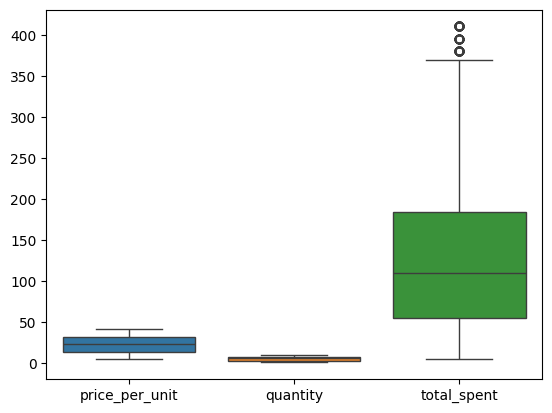

In [75]:
sns.boxplot(df)

In [76]:
#splitting Transaction Date into Transaction Month, Year and Day.
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

df["transaction_year"] = df["transaction_date"].dt.year
df["transaction_month"] = df["transaction_date"].dt.month
df["transaction_day"] = df["transaction_date"].dt.day
df.columns

Index(['transaction_id', 'customer_id', 'category', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'transaction_year', 'transaction_month',
       'transaction_day'],
      dtype='object')

In [77]:
df['transaction_month'].unique()

array([ 4,  7, 10,  5, 11,  6,  3, 12,  1,  9,  2,  8], dtype=int32)

In [78]:
month_map = {1: "january",
             2: "February",
             3: "March",
             4: "April",
             5: "May",
             6: "June",
             7: "July",
             8: "August",
             9: "september",
             10: "October",
             11: "November",
             12: "December"}
df['transaction_month'] = df['transaction_month'].map(month_map)

In [79]:
df['transaction_month'].unique()

array(['April', 'July', 'October', 'May', 'November', 'June', 'March',
       'December', 'january', 'september', 'February', 'August'],
      dtype=object)

In [80]:
df.head()

,transaction_id,customer_id,category,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,transaction_year,transaction_month,transaction_day
0,TXN_6867343,CUST_09,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,2024,April,8
1,TXN_3731986,CUST_22,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,2023,July,23
2,TXN_9303719,CUST_02,Butchers,21.5,2.0,43.0,Credit Card,Online,2022-10-05,2022,October,5
3,TXN_9458126,CUST_06,Beverages,27.5,9.0,247.5,Credit Card,Online,2022-05-07,2022,May,7
4,TXN_4575373,CUST_05,Food,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,2022,October,2


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     12575 non-null  object        
 1   customer_id        12575 non-null  object        
 2   category           12575 non-null  object        
 3   price_per_unit     12575 non-null  float64       
 4   quantity           12575 non-null  float64       
 5   total_spent        12575 non-null  float64       
 6   payment_method     12575 non-null  object        
 7   location           12575 non-null  object        
 8   transaction_date   12575 non-null  datetime64[ns]
 9   transaction_year   12575 non-null  int32         
 10  transaction_month  12575 non-null  object        
 11  transaction_day    12575 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(6)
memory usage: 1.1+ MB
